In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv('merged_output.csv')
# Load positive and depressed words
with open('positive-words.txt', 'r') as file:
    positive_words = set(file.read().splitlines())
with open('depressedword.txt', 'r') as file:
    depressed_words = set(file.read().splitlines())

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()  # Convert to lowercase

# Clean the content
df['cleaned_content'] = df['content'].apply(clean_text)

# Function to label the data
def label_sentiment(text):
    pos_count = sum(1 for word in text.split() if word in positive_words)
    dep_count = sum(1 for word in text.split() if word in depressed_words)
    return 1 if dep_count > pos_count else 0  # 1 = depressed, 0 = not depressed

# Apply labeling
df['label'] = df['cleaned_content'].apply(label_sentiment)

# Split the data into features and labels
X = df['cleaned_content']
y = df['label']

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Example usage
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return 'Depressed' if prediction[0] == 1 else 'Not Depressed'

# Test the model with a sample input
sample_input = "Im feeling good."
print(predict_sentiment(sample_input))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3393
           1       0.89      0.30      0.44        27

    accuracy                           0.99      3420
   macro avg       0.94      0.65      0.72      3420
weighted avg       0.99      0.99      0.99      3420

Not Depressed


In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('merged_output.csv')

# Load positive and depressed words
def load_words(filename):
    with open(filename, 'r') as file:
        return set(file.read().splitlines())

positive_words = load_words('positive-words.txt')
depressed_words = load_words('depressedword.txt')

# Function to clean and tokenize the text
def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return word_tokenize(text)

# Function to label the data
def label_sentiment(tokens):
    pos_count = sum(1 for word in tokens if word in positive_words)
    dep_count = sum(1 for word in tokens if word in depressed_words)
    return 1 if dep_count > pos_count else 0  # 1 = depressed, 0 = not depressed

# Clean and label the data
df['cleaned_tokens'] = df['content'].apply(clean_and_tokenize)
df['label'] = df['cleaned_tokens'].apply(label_sentiment)

# Split the data into features and labels
X = df['content']
y = df['label']

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', tokenizer=clean_and_tokenize)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Function to predict sentiment
def predict_sentiment(text):
    prediction = pipeline.predict([text])
    return 'Depressed' if prediction[0] == 1 else 'Not Depressed'

# Test the model with a sample input
sample_input = "I want to kill myself."
print(predict_sentiment(sample_input))

[nltk_data] Downloading package punkt to /Users/lt611-10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lt611-10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3393
           1       1.00      0.30      0.46        27

    accuracy                           0.99      3420
   macro avg       1.00      0.65      0.73      3420
weighted avg       0.99      0.99      0.99      3420

Not Depressed


Not Depressed


In [4]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('merged_output.csv')

# Load positive and depressed words
def load_words(filename):
    with open(filename, 'r') as file:
        return set(file.read().splitlines())

positive_words = load_words('positive-words.txt')
depressed_words = load_words('depressedword.txt')

# Function to clean and tokenize the text
def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return word_tokenize(text)

# Function to label the data
def label_sentiment(tokens):
    pos_count = sum(1 for word in tokens if word in positive_words)
    dep_count = sum(1 for word in tokens if word in depressed_words)
    return 1 if dep_count > pos_count else 0  # 1 = depressed, 0 = not depressed

# Clean and label the data
df['cleaned_tokens'] = df['content'].apply(clean_and_tokenize)
df['label'] = df['cleaned_tokens'].apply(label_sentiment)

# Split the data into features and labels
X = df['content']
y = df['label']

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', tokenizer=clean_and_tokenize)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
print("F1 score:", report['weighted avg']['f1-score'])

# Function to predict sentiment
def predict_sentiment(text):
    prediction = pipeline.predict([text])
    return 'Depressed' if prediction[0] == 1 else 'Not Depressed'

# Test the model with a sample input
sample_input = "I want to kill myself."
print(predict_sentiment(sample_input))

[nltk_data] Downloading package punkt to /Users/lt611-10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lt611-10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3393
           1       1.00      0.30      0.46        27

    accuracy                           0.99      3420
   macro avg       1.00      0.65      0.73      3420
weighted avg       0.99      0.99      0.99      3420

F1 score: 0.9929442636716699
Not Depressed


In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('merged_output.csv')

# Load positive and depressed words
def load_words(filename):
    with open(filename, 'r') as file:
        return set(file.read().splitlines())

positive_words = load_words('positive-words.txt')
depressed_words = load_words('depressedword.txt')

# Function to clean and tokenize the text
def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return word_tokenize(text)

# Function to label the data
def label_sentiment(tokens):
    pos_count = sum(1 for word in tokens if word in positive_words)
    dep_count = sum(1 for word in tokens if word in depressed_words)
    return 1 if dep_count > pos_count else 0  # 1 = depressed, 0 = not depressed

# Clean and label the data
df['cleaned_tokens'] = df['content'].apply(clean_and_tokenize)
df['label'] = df['cleaned_tokens'].apply(label_sentiment)

# Split the data into features and labels
X = df['content']
y = df['label']

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', tokenizer=clean_and_tokenize)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Function to predict sentiment
def predict_sentiment(text):
    prediction = pipeline.predict([text])
    return 'Depressed' if prediction[0] == 1 else 'Not Depressed'

# Test the model with a sample input
sample_inputs = [
    "I feel so hopeless and alone.",
    "I am really happy today!",
    "I want to kill myself.",
    "Everything seems dark and I can't see the light.",
    "Life is beautiful and I love it!",
]

for sample in sample_inputs:
    print(f"Input: '{sample}' => Prediction: {predict_sentiment(sample)}")

[nltk_data] Downloading package punkt to /Users/lt611-10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lt611-10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3393
           1       1.00      0.30      0.46        27

    accuracy                           0.99      3420
   macro avg       1.00      0.65      0.73      3420
weighted avg       0.99      0.99      0.99      3420

[[3393    0]
 [  19    8]]
Input: 'I feel so hopeless and alone.' => Prediction: Not Depressed
Input: 'I am really happy today!' => Prediction: Not Depressed
Input: 'I want to kill myself.' => Prediction: Not Depressed
Input: 'Everything seems dark and I can't see the light.' => Prediction: Not Depressed
Input: 'Life is beautiful and I love it!' => Prediction: Not Depressed


In [10]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('merged_output.csv')

# Check the structure of the dataset
print(df.head())
print(df['content'].isnull().sum())  # Check for missing values in the 'content' column

# Load positive and depressed words
def load_words(filename):
    with open(filename, 'r') as file:
        return set(file.read().splitlines())

positive_words = load_words('positive-words.txt')
depressed_words = load_words('depressedword.txt')

# Function to clean and tokenize the text
def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    return word_tokenize(text)

# Function to label the data
def label_sentiment(tokens):
    pos_count = sum(1 for word in tokens if word in positive_words)
    dep_count = sum(1 for word in tokens if word in depressed_words)
    return 1 if dep_count > pos_count else 0  # 1 = depressed, 0 = not depressed

# Clean and label the data
df['cleaned_tokens'] = df['content'].apply(clean_and_tokenize)
df['label'] = df['cleaned_tokens'].apply(label_sentiment)

# Check data distribution
print(df['label'].value_counts())

# Split the data into features and labels
X = df['content']
y = df['label']

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', tokenizer=clean_and_tokenize)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))  # Random forest classifier
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Function to predict sentiment
def predict_sentiment(text):
    prediction = pipeline.predict([text])
    return 'Depressed' if prediction[0] == 1 else 'Not Depressed'

# Test the model with various sample inputs
sample_inputs = [
    "I feel so hopeless and alone.",
    "I am really happy today!",
    "I want to kill myself.",
    "Everything seems dark and I can't see the light.",
    "Life is beautiful and I love it!",
]

for sample in sample_inputs:
    print(f"Input: '{sample}' => Prediction: {predict_sentiment(sample)}")

[nltk_data] Downloading package punkt to /Users/lt611-10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lt611-10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   start_time  end_time  len_time          who                   content
0      32.738    33.068      0.33  Participant                 thank you
1      42.088    42.518      0.43  Participant                     mmm k
2      54.328    55.758      1.43  Participant  i'm doing good thank you
3      59.858    60.948      1.09  Participant      i'm from los angeles
4      63.538    64.108      0.57  Participant                  oh great
0
label
0    16949
1      147
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3393
           1       1.00      0.30      0.46        27

    accuracy                           0.99      3420
   macro avg       1.00      0.65      0.73      3420
weighted avg       0.99      0.99      0.99      3420

[[3393    0]
 [  19    8]]
Input: 'I feel so hopeless and alone.' => Prediction: Not Depressed
Input: 'I am really happy today!' => Prediction: Not Depressed
Input: 'I want to kill myself.' => Prediction: Not Depressed
Input: 'Everything seems dark and I can't see the light.' => Prediction: Not Depressed
Input: 'Life is beautiful and I love it!' => Prediction: Not Depressed


In [14]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('merged_output.csv')

# Load positive and depressed words
def load_words(filename):
    with open(filename, 'r') as file:
        return set(file.read().splitlines())

positive_words = load_words('positive-words.txt')
depressed_words = load_words('depressedword.txt')

# Function to clean and tokenize the text
def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return word_tokenize(text)

# Function to label the data
def label_sentiment(tokens):
    pos_count = sum(1 for word in tokens if word in positive_words)
    dep_count = sum(1 for word in tokens if word in depressed_words)
    return 1 if dep_count > pos_count else 0  # 1 = depressed, 0 = not depressed

# Clean and label the data
df['cleaned_tokens'] = df['content'].apply(clean_and_tokenize)
df['label'] = df['cleaned_tokens'].apply(label_sentiment)

# Split the data into features and labels
X = df['content']
y = df['label']

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', tokenizer=clean_and_tokenize)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Function to predict sentiment
def predict_sentiment(text):
    prediction = pipeline.predict([text])
    return 'Depressed' if prediction[0] == 1 else 'Not Depressed'

# Test the model with various sample inputs
sample_inputs = [
    "I feel so hopeless and alone.",
    "I am really happy today!",
    "I want to kill myself.",
    "Everything seems dark and I can't see the light.",
    "Life is beautiful and I love it!",
]

for sample in sample_inputs:
    print(f"Input: '{sample}' => Prediction: {predict_sentiment(sample)}")

[nltk_data] Downloading package punkt to /Users/lt611-10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lt611-10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3393
           1       1.00      0.30      0.46        27

    accuracy                           0.99      3420
   macro avg       1.00      0.65      0.73      3420
weighted avg       0.99      0.99      0.99      3420

[[3393    0]
 [  19    8]]
Input: 'I feel so hopeless and alone.' => Prediction: Not Depressed
Input: 'I am really happy today!' => Prediction: Not Depressed
Input: 'I want to kill myself.' => Prediction: Not Depressed
Input: 'Everything seems dark and I can't see the light.' => Prediction: Not Depressed
Input: 'Life is beautiful and I love it!' => Prediction: Not Depressed


[nltk_data] Downloading package punkt to /Users/lt611-10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lt611-10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Overview:
   start_time  end_time  len_time          who                   content
0      32.738    33.068      0.33  Participant                 thank you
1      42.088    42.518      0.43  Participant                     mmm k
2      54.328    55.758      1.43  Participant  i'm doing good thank you
3      59.858    60.948      1.09  Participant      i'm from los angeles
4      63.538    64.108      0.57  Participant                  oh great

Missing Values in 'content': 0

Label Distribution:
label
0    16816
1      280
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3379
           1       0.92      0.29      0.44        41

    accuracy                           0.99      3420
   macro avg       0.96      0.65      0.72      3420
weighted avg       0.99      0.99      0.99      3420



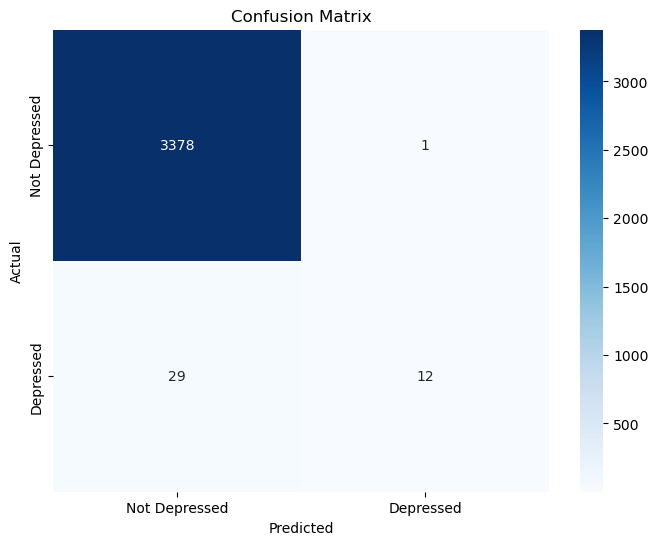

Input: 'I am really happy today!' => Prediction: Not Depressed
Input: 'I want to kill myself.' => Prediction: Not Depressed
Input: 'Everything seems dark but I can see the light.' => Prediction: Not Depressed
Input: 'Life is beautiful and I love it!' => Prediction: Not Depressed
Input: 'Nothing feels right anymore.' => Prediction: Not Depressed


In [39]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK data if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('merged_output.csv')

# Check the structure of the dataset
print("Dataset Overview:")
print(df.head())
print("\nMissing Values in 'content':", df['content'].isnull().sum())  # Check for missing values

# Load positive and depressed words
def load_words(filename):
    with open(filename, 'r') as file:
        return set(file.read().splitlines())

positive_words = load_words('positive-words.txt')  # Ensure this file is correct
depressed_words = load_words('depressedword.txt')   # Ensure this file is comprehensive

# Function to clean and tokenize the text
def clean_and_tokenize(text):
    text = re.sub(r"[^\w\s']", '', text.lower())  # Remove punctuation and convert to lowercase, keep apostrophes
    return word_tokenize(text)

# Function to label the data
def label_sentiment(tokens):
    pos_count = sum(1 for word in tokens if word in positive_words)
    dep_count = sum(1 for word in tokens if word in depressed_words)
    return 1 if dep_count > pos_count else 0  # 1 = depressed, 0 = not depressed

# Clean and label the data
df['cleaned_tokens'] = df['content'].apply(clean_and_tokenize)
df['label'] = df['cleaned_tokens'].apply(label_sentiment)

# Check data distribution
print("\nLabel Distribution:")
print(df['label'].value_counts())

# Split the data into features and labels
X = df['content']
y = df['label']

# Create a pipeline with adjusted TfidfVectorizer
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', tokenizer=clean_and_tokenize, ngram_range=(1, 2))),  # Using unigrams and bigrams
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))  # Random forest classifier
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Function to predict sentiment
def predict_sentiment(text):
    prediction = pipeline.predict([text])
    return 'Depressed' if prediction[0] == 1 else 'Not Depressed'

# Test the model with various sample inputs
sample_inputs = [
    "I am really happy today!",
    "I want to kill myself.",
    "Everything seems dark but I can see the light.",
    "Life is beautiful and I love it!",
    "Nothing feels right anymore.",
]

for sample in sample_inputs:
    print(f"Input: '{sample}' => Prediction: {predict_sentiment(sample)}")

ModuleNotFoundError: No module named 'vaderSentiment'